**Word Cloud** 
merupakan model mapping kata yg ada dalam text mining untuk mempermudah malam mengamati bahasan atau sesuatu hal yang sedang ramai **diperbincangkan**

In [1]:
import pandas as pd
import numpy as np 
import re
import nltk 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
dataset = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Scraping Twitter/scraping-tweet.csv")

In [5]:
dataset.head()

,Unnamed: 0,Created At,Screen Name,Tweet,Location,Number of Retweet,Number of Like
0,0,2021-04-27 21:18:34,Danewwwww,@watashi_NoUso 😂😂😂😂 sesekali tiber,NaN,0,0
1,1,2021-04-27 21:17:15,watashi_NoUso,@Danewwwww Kemain Dani sekarang,NaN,0,0
2,2,2021-04-27 21:16:42,eddeFNBR,"@LiquidVeIa @tilfnbr ashita, watashi no namae ...",NaN,0,0
3,3,2021-04-27 21:13:44,watashi_NoUso,"@mangopft Yeay pat makan, kita dah tunggu kat ...",NaN,0,0
4,4,2021-04-27 21:12:13,ToastyBun_,watashi? https://t.co/GJgwVtdlOp,Sweden 🇸🇪,0,0


In [6]:
label = dataset['Tweet']

In [7]:
label[:10]

0                   @watashi_NoUso 😂😂😂😂 sesekali tiber
1                      @Danewwwww Kemain Dani sekarang
2    @LiquidVeIa @tilfnbr ashita, watashi no namae ...
3    @mangopft Yeay pat makan, kita dah tunggu kat ...
4                     watashi? https://t.co/GJgwVtdlOp
5                                  watashi wa kurapika
6    RT @Dapoq_pdot: Ramadhan 2021 Day 15: Cucoq Ja...
7    Konnichiwa. Watashi wa Sora desu. Hajimashite....
8    @mangopft Burp alhamdulillah, Wayne tak makan ...
9    @DenizPo34362173 @Barann24122785 @watashi_wa_a...
Name: Tweet, dtype: object

## Text **Cleaning**

In [8]:
processed_features = []

for sentence in range(0, len(label)):
    # Remove all the special characters
    processed_feature = re.sub(r'\W', ' ', str(label[sentence]))

    # remove all single characters
    processed_feature= re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)

    # Remove single characters from the start
    processed_feature = re.sub(r'^[a-zA-Z]\s+', '', processed_feature) 
    
    # Substituting multiple spaces with single space
    processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I)

    # Removing prefixed 'b'
    processed_feature = re.sub(r'^b\s+', '', processed_feature)
    
    # Converting to Lowercase
    processed_feature = processed_feature.lower()

    processed_features.append(processed_feature)

In [ ]:
label[:10]

0    RT @Indostransfer: Marselino Ferdinan akan deb...
1    RT @eljakomik: Kalah/menang itu untung-untunga...
2                                     Pss vs persebaya
3    RT @Indostransfer: Marselino Ferdinan akan deb...
4                                     PSS vs Persebaya
5    RT @Indostransfer: Marselino Ferdinan akan deb...
6    RT @dribble9: Pss kalo ga bisa menang lawan bo...
7    Supaya gak perlu repot2 ngundi venue pertandin...
8    RT @CS_SLEMANO2012: Hari ini milik kita, poin ...
9    RT @Indostransfer: Marselino Ferdinan akan deb...
Name: Tweet, dtype: object

## **NLTK**

In [9]:
import nltk
nltk.download('punkt') # Sentence Tokenizer
nltk.download('stopwords') # Stopword

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

## **Stopword** indonesia

In [10]:
from nltk.corpus import stopwords
stop=nltk.corpus.stopwords.words('indonesian')
label = label.apply(lambda x: " ".join(x for x in x.split() if x not in stop))
label.head()

0                            @watashi_NoUso 😂😂😂😂 tiber
1                               @Danewwwww Kemain Dani
2    @LiquidVeIa @tilfnbr ashita, watashi no namae ...
3    @mangopft Yeay pat makan, dah tunggu kat katil...
4                     watashi? https://t.co/GJgwVtdlOp
Name: Tweet, dtype: object

## Menghapus  Tanda baca

In [11]:
label = label.str.replace('[^\w\s]','')
label.head()

0                                 watashi_NoUso  tiber
1                                Danewwwww Kemain Dani
2    LiquidVeIa tilfnbr ashita watashi no namae wa ...
3    mangopft Yeay pat makan dah tunggu kat katil n...
4                           watashi httpstcoGJgwVtdlOp
Name: Tweet, dtype: object

# **Word Cloud**

In [12]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
word_string=" ".join(label.str.lower())
wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='white', 
                         ).generate(word_string)

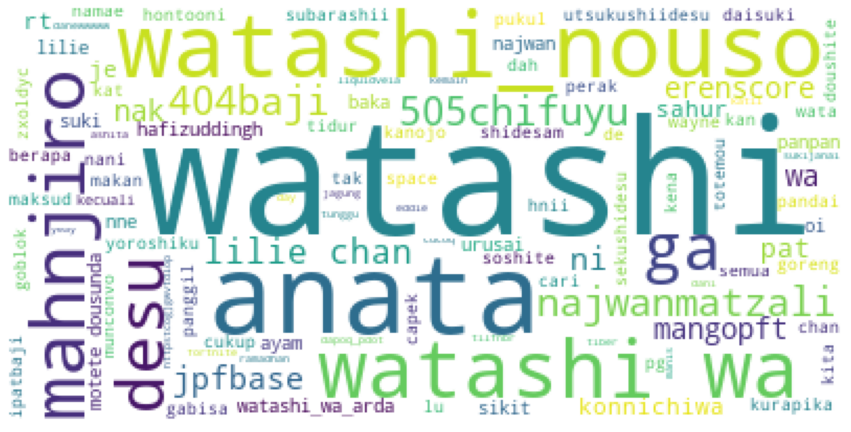

In [13]:
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()